In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("amazon_sales.csv")

In [3]:
df

,order_id,order_date,asin,sku,category,marketplace,fulfillment_channel,quantity,item_price,shipping_fee,tax_amount,total_amount,currency,customer_country,is_refunded
0,AMZ359034951,08-02-25,3DCXNK3O2G,SKU-389452,Toys,Amazon.co.uk,FBM,1,63.20,11.70,6.32,81.22,USD,US,0
1,AMZ891492717,27-02-25,91LH9GWKQU,SKU-815928,Office Supplies,Amazon.de,FBM,3,38.99,6.89,3.90,127.76,USD,FR,0
2,AMZ525054555,09-02-25,J5YPWZ8235,SKU-779729,Home & Kitchen,Amazon.com,FBM,3,15.97,14.55,1.60,64.06,USD,UK,0
3,AMZ139069032,07-02-25,WMB8HDW9N0,SKU-659897,Electronics,Amazon.co.uk,FBA,2,62.73,2.75,6.27,134.48,USD,UK,0
4,AMZ471691210,22-01-25,18ADVW2946,SKU-520101,Beauty,Amazon.de,FBM,1,135.26,4.37,13.53,153.16,USD,FR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AMZ922212366,26-01-25,20BHAI03IM,SKU-288423,Office Supplies,Amazon.de,FBA,1,17.88,0.98,1.79,20.65,USD,FR,0
496,AMZ245958691,08-01-25,TZYN5T75E4,SKU-454905,Beauty,Amazon.co.uk,FBM,1,123.31,11.98,12.33,147.62,USD,DE,0
497,AMZ557352113,23-01-25,0QHGAKFOXG,SKU-954026,Office Supplies,Amazon.com,FBA,1,125.24,1.40,12.52,139.16,USD,FR,0
498,AMZ017143021,11-01-25,SXZ0BKDD8U,SKU-786337,Office Supplies,Amazon.co.uk,FBM,2,37.27,5.35,3.73,83.62,USD,CA,0


In [4]:
df.shape

(500, 15)

In [5]:
df.columns

Index(['order_id', 'order_date', 'asin', 'sku', 'category', 'marketplace',
       'fulfillment_channel', 'quantity', 'item_price', 'shipping_fee',
       'tax_amount', 'total_amount', 'currency', 'customer_country',
       'is_refunded'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             500 non-null    object 
 1   order_date           500 non-null    object 
 2   asin                 500 non-null    object 
 3   sku                  500 non-null    object 
 4   category             500 non-null    object 
 5   marketplace          500 non-null    object 
 6   fulfillment_channel  500 non-null    object 
 7   quantity             500 non-null    int64  
 8   item_price           500 non-null    float64
 9   shipping_fee         500 non-null    float64
 10  tax_amount           500 non-null    float64
 11  total_amount         500 non-null    float64
 12  currency             500 non-null    object 
 13  customer_country     500 non-null    object 
 14  is_refunded          500 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memor

In [7]:
df.isna().sum().sort_values(ascending=False)

order_id               0
order_date             0
asin                   0
sku                    0
category               0
marketplace            0
fulfillment_channel    0
quantity               0
item_price             0
shipping_fee           0
tax_amount             0
total_amount           0
currency               0
customer_country       0
is_refunded            0
dtype: int64

In [8]:
df.duplicated().sum()
df["order_id"].duplicated().sum()

np.int64(0)

In [9]:
cols_check = ["category","marketplace","fulfillment_channel","currency","customer_country","is_refunded"]
{c: df[c].unique() for c in cols_check}

{'category': array(['Toys', 'Office Supplies', 'Home & Kitchen', 'Electronics',
        'Beauty', 'Sports'], dtype=object),
 'marketplace': array(['Amazon.co.uk', 'Amazon.de', 'Amazon.com'], dtype=object),
 'fulfillment_channel': array(['FBM', 'FBA'], dtype=object),
 'currency': array(['USD'], dtype=object),
 'customer_country': array(['US', 'FR', 'UK', 'DE', 'CA'], dtype=object),
 'is_refunded': array([0, 1], dtype=int64)}

In [10]:
num_cols = ["quantity","item_price","shipping_fee","tax_amount","total_amount"]
df[num_cols].describe()

(df[num_cols] < 0).sum()
(df["quantity"] == 0).sum()

np.int64(0)

### Data Standardization & Logical Validation

In [11]:
df["order_date"] = pd.to_datetime(df["order_date"])

<ipython-input-11-933f595e4984>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["order_date"] = pd.to_datetime(df["order_date"])


In [43]:
df["order_date"].min(), df["order_date"].max()

(Timestamp('2025-01-01 00:00:00'), Timestamp('2025-12-02 00:00:00'))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             500 non-null    object        
 1   order_date           500 non-null    datetime64[ns]
 2   asin                 500 non-null    object        
 3   sku                  500 non-null    object        
 4   category             500 non-null    object        
 5   marketplace          500 non-null    object        
 6   fulfillment_channel  500 non-null    object        
 7   quantity             500 non-null    int64         
 8   item_price           500 non-null    float64       
 9   shipping_fee         500 non-null    float64       
 10  tax_amount           500 non-null    float64       
 11  total_amount         500 non-null    float64       
 12  currency             500 non-null    object        
 13  customer_country     500 non-null  

In [15]:
df["calculated_total"] = (
    df["quantity"] * df["item_price"] +
    df["shipping_fee"] +
    df["tax_amount"]
).round(2)

(df["total_amount"] - df["calculated_total"]).abs().sum()

np.float64(0.0)

In [16]:
# Negative or zero values
print("Zero quantity:", (df["quantity"] == 0).sum())
print("Negative prices:", (df["item_price"] < 0).sum())
print("Negative shipping:", (df["shipping_fee"] < 0).sum())
print("Negative tax:", (df["tax_amount"] < 0).sum())
print("Negative total:", (df["total_amount"] < 0).sum())

Zero quantity: 0
Negative prices: 0
Negative shipping: 0
Negative tax: 0
Negative total: 0


In [17]:
df["is_refunded"].value_counts(normalize=True)

is_refunded
0    0.954
1    0.046
Name: proportion, dtype: float64

In [18]:
df.drop(columns=["calculated_total"], inplace=True)

### Core Revenue KPIs

In [28]:
total_revenue = float(df["total_amount"].sum())
total_orders = int(df["order_id"].nunique())
total_units = int(df["quantity"].sum())
aov = float(df["total_amount"].mean())
refund_rate = float(df["is_refunded"].mean())

kpi_summary = {
    "total_revenue": round(total_revenue, 2),
    "total_orders": total_orders,
    "total_units": total_units,
    "average_order_value": round(aov, 2),
    "refund_rate": round(refund_rate, 4)
}
kpi_summary

{'total_revenue': 161576.08,
 'total_orders': 500,
 'total_units': 966,
 'average_order_value': 323.15,
 'refund_rate': 0.046}

In [30]:
revenue_by_marketplace = {
    k: float(v)
    for k, v in (
        df.groupby("marketplace")["total_amount"]
        .sum().round(2).sort_values(ascending=False)
        .items()
    )
}
revenue_by_marketplace

{'Amazon.com': 56297.0, 'Amazon.co.uk': 54181.04, 'Amazon.de': 51098.04}

In [31]:
revenue_by_fulfillment = {
    k: float(v)
    for k, v in (
        df.groupby("fulfillment_channel")["total_amount"]
        .sum().round(2).sort_values(ascending=False)
        .items()
    )
}
revenue_by_fulfillment

{'FBM': 82336.24, 'FBA': 79239.84}

In [32]:
revenue_by_category = {
    k: float(v)
    for k, v in (
        df.groupby("category")["total_amount"]
        .sum().round(2).sort_values(ascending=False)
        .items()
    )
}
revenue_by_category

{'Toys': 31350.3,
 'Office Supplies': 30715.2,
 'Electronics': 25900.58,
 'Sports': 25796.38,
 'Home & Kitchen': 25038.24,
 'Beauty': 22775.38}

### Revenue Trend (Daily)

In [33]:
import matplotlib.pyplot as plt

daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)
daily_revenue.head()

order_date
2025-01-01    3412.38
2025-01-02    2684.09
2025-01-03    2380.22
2025-01-13    1442.44
2025-01-14    3512.39
Name: total_amount, dtype: float64

In [45]:
daily_revenue.index.dtype

dtype('<M8[ns]')

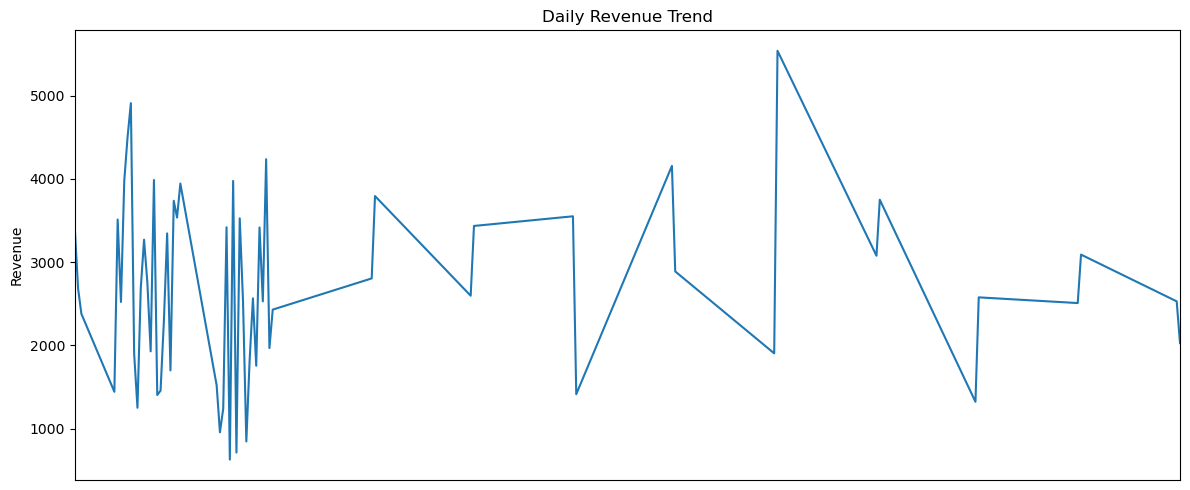

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(daily_revenue.index, daily_revenue.values)

ax.set_xlim(daily_revenue.index.min(), daily_revenue.index.max())

ax.set_xlabel("")

ax.set_xticks([])

ax.set_title("Daily Revenue Trend")
ax.set_ylabel("Revenue")

plt.tight_layout()
plt.show()

In [49]:
marketplace_revenue = (
    df.groupby("marketplace")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

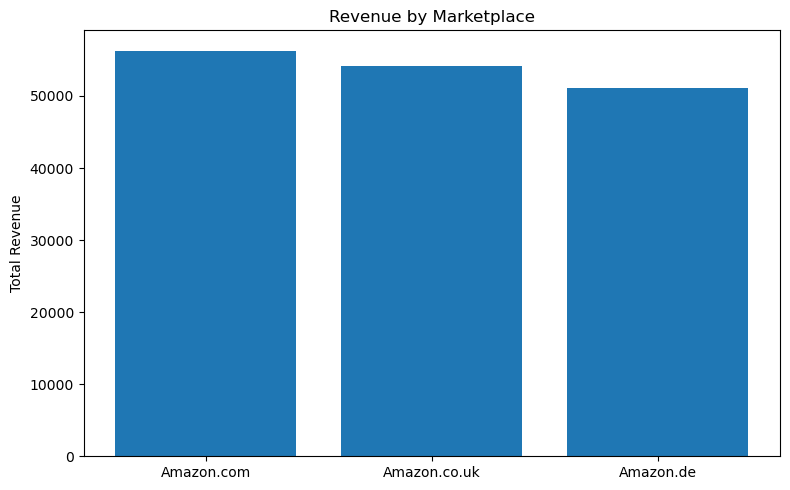

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(marketplace_revenue.index, marketplace_revenue.values)

ax.set_title("Revenue by Marketplace")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [51]:
fulfillment_revenue = (
    df.groupby("fulfillment_channel")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

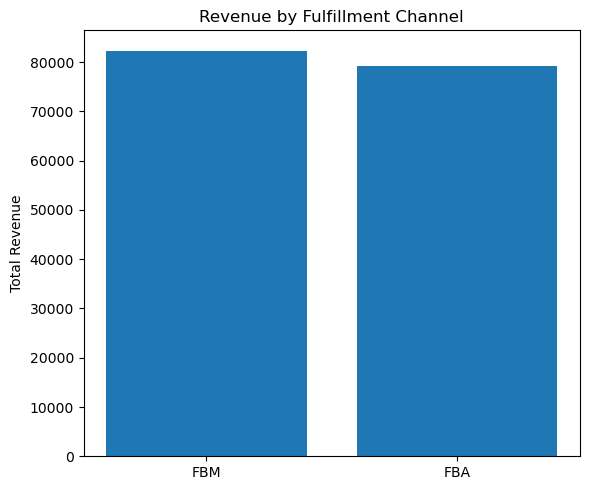

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))

ax.bar(fulfillment_revenue.index, fulfillment_revenue.values)

ax.set_title("Revenue by Fulfillment Channel")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [53]:
total_refunded_orders = int(df["is_refunded"].sum())

refunded_revenue = float(
    df.loc[df["is_refunded"] == 1, "total_amount"].sum()
)

refund_summary = {
    "total_refunded_orders": total_refunded_orders,
    "refund_rate": round(float(df["is_refunded"].mean()), 4),
    "refunded_revenue": round(refunded_revenue, 2)
}

refund_summary

{'total_refunded_orders': 23,
 'refund_rate': 0.046,
 'refunded_revenue': 5769.95}

In [54]:
refund_by_fulfillment = (
    df.groupby("fulfillment_channel")["is_refunded"]
    .mean()
    .round(4)
    .to_dict()
)

refund_by_fulfillment

{'FBA': 0.0437, 'FBM': 0.0484}

In [55]:
refund_by_category = (
    df.groupby("category")["is_refunded"]
    .mean()
    .round(4)
    .sort_values(ascending=False)
    .to_dict()
)

refund_by_category

{'Beauty': 0.0779,
 'Electronics': 0.0658,
 'Home & Kitchen': 0.0595,
 'Office Supplies': 0.0532,
 'Toys': 0.0222,
 'Sports': 0.0}

In [58]:
import json


data_metadata = {
    "rows": int(df.shape[0]),
    "columns": int(df.shape[1]),
    "date_min": df["order_date"].min().strftime("%Y-%m-%d"),
    "date_max": df["order_date"].max().strftime("%Y-%m-%d"),
    "marketplaces": sorted(df["marketplace"].unique().tolist()),
    "categories": sorted(df["category"].unique().tolist()),
    "fulfillment_channels": sorted(df["fulfillment_channel"].unique().tolist()),
    "currency": sorted(df["currency"].unique().tolist())
}


top_products_by_revenue = (
    df.groupby(["asin", "sku"])["total_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .round(2)
    .reset_index()
    .to_dict(orient="records")
)


daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)

trend_summary = {
    "daily_revenue_start": float(daily_revenue.iloc[0].round(2)),
    "daily_revenue_end": float(daily_revenue.iloc[-1].round(2)),
    "daily_revenue_avg": float(daily_revenue.mean().round(2)),
    "peak_day": daily_revenue.idxmax().strftime("%Y-%m-%d"),
    "peak_day_revenue": float(daily_revenue.max().round(2)),
    "low_day": daily_revenue.idxmin().strftime("%Y-%m-%d"),
    "low_day_revenue": float(daily_revenue.min().round(2)),
}


report_data = {
    "report_title": "Amazon eCommerce Performance Report: Revenue, Risk & Fulfillment Efficiency",
    "business_questions": [
        "How is revenue trending over time and are there volatility peaks?",
        "Which marketplaces and categories drive the most revenue?",
        "Is fulfillment strategy balanced between FBA and FBM, and which performs better?",
        "What is the refund rate, what is the revenue exposure, and where is risk concentrated?"
    ],
    "data_metadata": data_metadata,

    "kpis": kpi_summary,

    "segmentation": {
        "revenue_by_marketplace": revenue_by_marketplace,
        "revenue_by_fulfillment": revenue_by_fulfillment,
        "revenue_by_category": revenue_by_category,
        "top_products_by_revenue": top_products_by_revenue
    },

    "risk": {
        "refund_summary": refund_summary,
        "refund_rate_by_fulfillment": refund_by_fulfillment,
        "refund_rate_by_category": refund_by_category
    },

    "trend_summary": trend_summary
}

json.dumps(report_data)[:300]

'{"report_title": "Amazon eCommerce Performance Report: Revenue, Risk & Fulfillment Efficiency", "business_questions": ["How is revenue trending over time and are there volatility peaks?", "Which marketplaces and categories drive the most revenue?", "Is fulfillment strategy balanced between FBA and F'

In [65]:
import os
import json

# папка для графіків
CHART_DIR = "charts"
os.makedirs(CHART_DIR, exist_ok=True)

# тут report_data вже має бути зібраний (як ми робили раніше)
# + додамо секцію під артефакти (графіки)
report_data.setdefault("artifacts", {})
report_data["artifacts"]["charts"] = {
    "daily_revenue_trend": f"{CHART_DIR}/daily_revenue_trend.png",
    "revenue_by_marketplace": f"{CHART_DIR}/revenue_by_marketplace.png",
    "revenue_by_fulfillment": f"{CHART_DIR}/revenue_by_fulfillment.png",
}

with open("retail_ai_report_data.json", "w", encoding="utf-8") as f:
    json.dump(report_data, f, indent=4, ensure_ascii=False)

In [66]:
import matplotlib.pyplot as plt

# 1) Daily revenue trend
daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(daily_revenue.index, daily_revenue.values)
ax.set_xlim(daily_revenue.index.min(), daily_revenue.index.max())
ax.set_title("Daily Revenue Trend")
ax.set_ylabel("Revenue")
ax.set_xlabel("")
ax.set_xticks([])  # як ти просив — без підписів по X
plt.tight_layout()
plt.savefig(report_data["artifacts"]["charts"]["daily_revenue_trend"], dpi=200)
plt.close()


# 2) Revenue by marketplace
marketplace_revenue = (
    df.groupby("marketplace")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(marketplace_revenue.index, marketplace_revenue.values)
ax.set_title("Revenue by Marketplace")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(report_data["artifacts"]["charts"]["revenue_by_marketplace"], dpi=200)
plt.close()


# 3) Revenue by fulfillment (FBA vs FBM)
fulfillment_revenue = (
    df.groupby("fulfillment_channel")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(fulfillment_revenue.index, fulfillment_revenue.values)
ax.set_title("Revenue by Fulfillment Channel")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(report_data["artifacts"]["charts"]["revenue_by_fulfillment"], dpi=200)
plt.close()

In [67]:
import json
import os
from dotenv import load_dotenv
from openai import OpenAI

load_dotenv()

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

PROMPT = """
You are a senior eCommerce data analyst. Create an executive-level business report in Markdown.

Rules:
- Use ONLY the provided INPUT DATA.
- Make the report decision-ready: short sections, clear KPIs, specific insights, and actions.
- Structure:
  1) Executive Summary (5-8 bullets)
  2) KPI Snapshot (table)
  3) Revenue Performance (trend + marketplace + category highlights)
  4) Fulfillment Efficiency (FBA vs FBM)
  5) Risk & Refunds (impact + where risk concentrates)
  6) Recommendations (3-6 actions, prioritized)
  7) Appendix: Data notes (date range, rows, key assumptions)

Charts:
- Insert the charts as Markdown images in the relevant sections using the file paths from:
  INPUT DATA -> artifacts -> charts
  Example: ![](charts/daily_revenue_trend.png)
"""

report_json_str = json.dumps(report_data, indent=4, ensure_ascii=False)

prompt = f"""{PROMPT}

INPUT DATA:
{report_json_str}
"""

response = client.responses.create(
    model="gpt-5.2",        # можеш замінити на доступну тобі модель
    input=prompt
)

business_report_md = response.output_text  # <-- актуальний спосіб діставати текст :contentReference[oaicite:1]{index=1}

with open("business_report.md", "w", encoding="utf-8") as f:
    f.write(business_report_md)

<class 'ModuleNotFoundError'>: No module named 'dotenv'